In [1]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from pandas.api.types import is_string_dtype
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling as pp

In [2]:
os.chdir("/Users/adityaraj/Desktop/Data Mining and Machine Learning Folder/Project/Final/")
melbourne = pd.read_csv('./Melbourne_housing_FULL.csv')

In [3]:
# Number of Rows and Columns within the dataset
melbourne.shape

(34857, 21)

In [4]:
# Displaying first 5 records of Melbourne house dataset
melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/16,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/16,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/16,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/16,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/17,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
#Analyze all the attributes with pandas profiling
Melbourne_profiling_report=pp.ProfileReport(melbourne)
Melbourne_profiling_report.to_file('Melbourne_Housing_Profiling_Report.html')

In [6]:
# Checking the number of Missing Values in each attribute of the dataset
print("Missing Data : \n\n", melbourne.isnull().sum())

Missing Data : 

 Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [7]:
melbourne.shape

(34857, 21)

<AxesSubplot:>

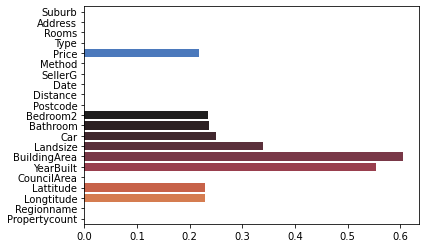

In [8]:
# Number of missing values in each attribute using barplot
sns.barplot(x=melbourne.isnull().sum()/34857, y=melbourne.columns, palette="icefire")

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Method', ylabel='count'>

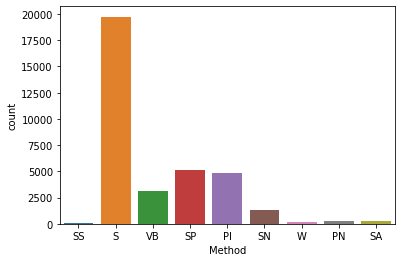

In [9]:
sns.countplot(melbourne['Method'])

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

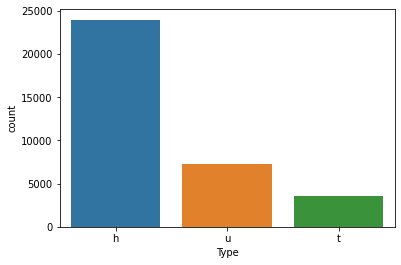

In [10]:
sns.countplot(melbourne['Type'])

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

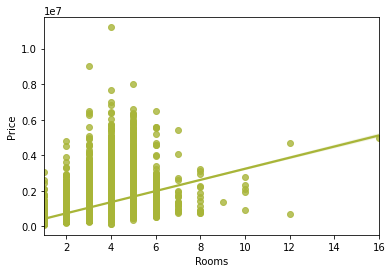

In [11]:
sns.regplot(x='Rooms',y='Price',data=melbourne, color='#a8b538')

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

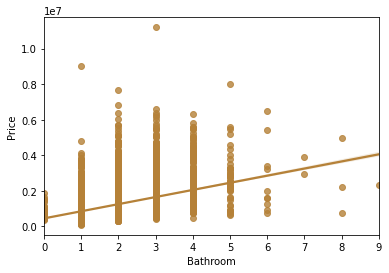

In [12]:
sns.regplot(x='Bathroom',y='Price',data=melbourne, color='#b58138')

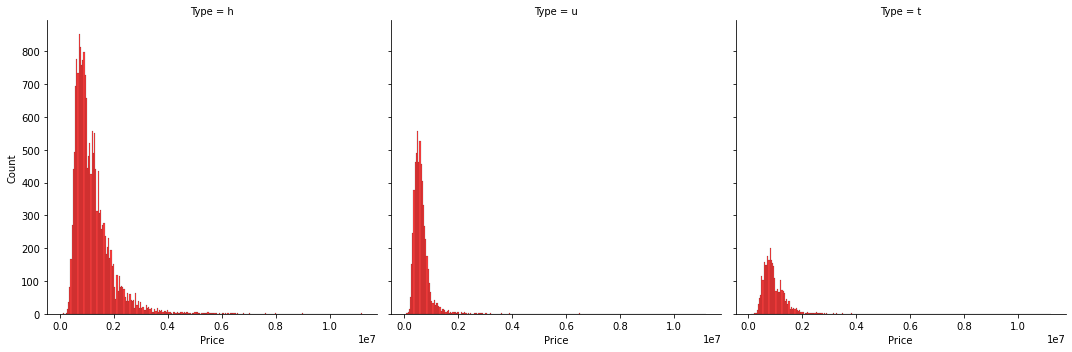

In [13]:
sns.displot(melbourne, x="Price", col="Type", multiple="dodge", color='red')

In [14]:
melbourne.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:title={'center':'Price'}, xlabel='Regionname'>],
      dtype=object)

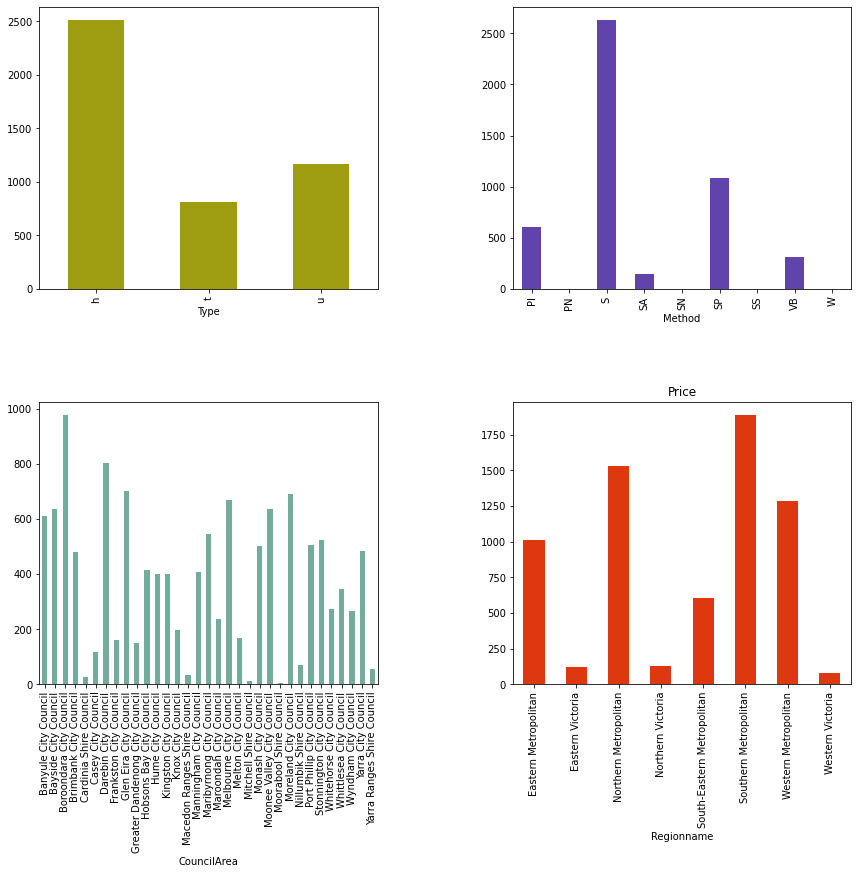

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,10))
fig.tight_layout()
fig.subplots_adjust(wspace=0.4,hspace=0.4)
melbourne['Price'].groupby(melbourne['Type']).nunique().plot(kind='bar',ax=axes[0,0], color='#9e9c11')
melbourne['Price'].groupby(melbourne['Method']).nunique().plot(kind='bar',ax=axes[0,1], color='#6044ac')
melbourne['Price'].groupby(melbourne['CouncilArea']).nunique().plot(kind='bar',ax=axes[1,0], color='#73ac9a')
melbourne['Price'].groupby(melbourne['Regionname']).nunique().plot(subplots=True,kind='bar',ax=axes[1,1], color='#de3810')


In [16]:
#Select columns for X
cols = melbourne.columns
cols = cols.drop('Price')

melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [17]:
#Drop down data instances where Price is not defined or NULL
melbourne = melbourne[melbourne.Price.notnull()]

#Display 1st five instances of data
melbourne.head()

#Display number of rows and columns after dropping not null values for Prices
melbourne.shape

(27247, 21)

In [18]:
#Seperate categorical from numerical data
mel_cat = melbourne.select_dtypes(exclude = [np.number])
mel_num = melbourne.select_dtypes(include = [np.number])

In [19]:
#Tranform categorical data into numerical data for training purpose
for col, col_data in melbourne.items():
    if is_string_dtype(col_data):
        melbourne[col] = melbourne[col].astype('category').cat.as_ordered().cat.codes

<ipython-input-19-74ec0f2020aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melbourne[col] = melbourne[col].astype('category').cat.as_ordered().cat.codes


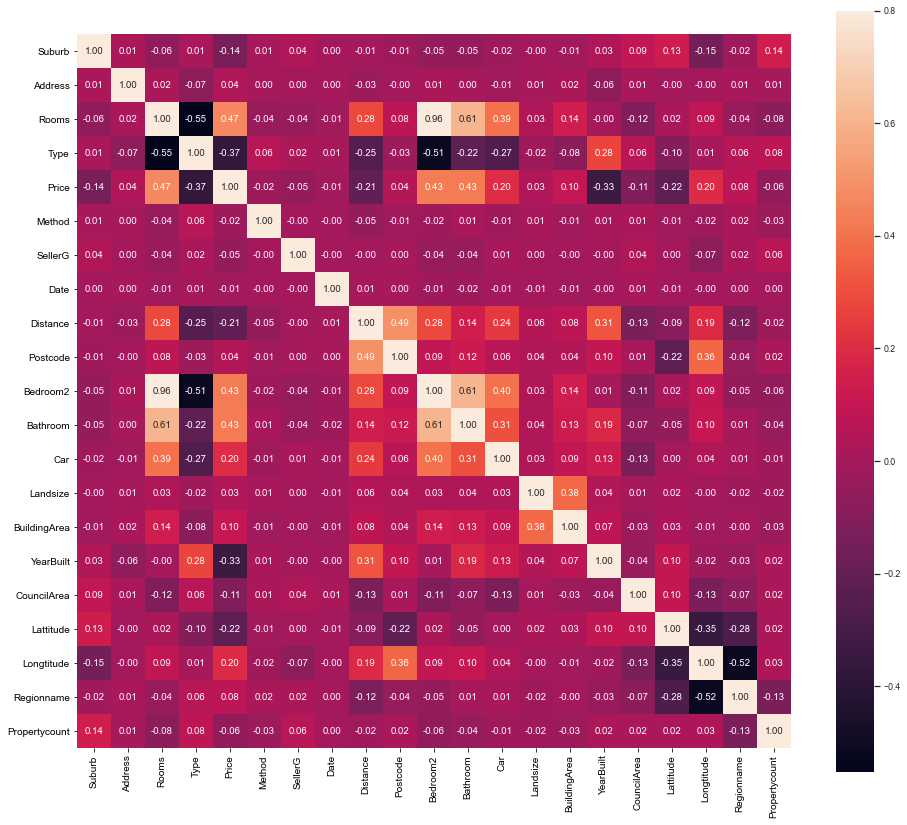

In [20]:
# SalePrice correlation matrix
correlationmatrix = melbourne.corr()
f, ax = plt.subplots(figsize=(16, 14))
sns.set(font_scale=0.8)
sns.heatmap(correlationmatrix,annot=True, square=True, fmt='.2f', vmax=.8);

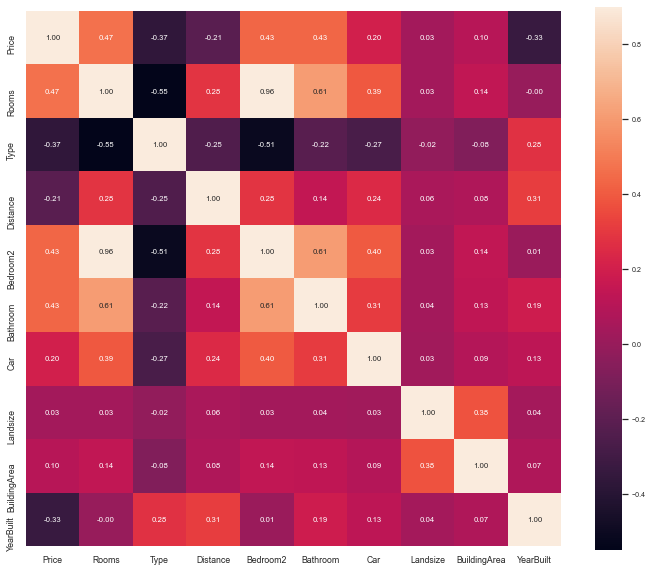

In [21]:
# choosing features to check the collinearity between them
correlationcolumns = ['Price', 'Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car','Landsize','BuildingArea', 
                      'YearBuilt']
correlationmatrix = melbourne[correlationcolumns].corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=0.65)
sns.heatmap(correlationmatrix,annot=True, square=True, fmt='.2f', vmax=.9);

It is observed that Room and Bedroom have a strong correlation of 0.97, we will drop Bedroom2 column from our dataset

In [22]:
correlationcolumns.remove('Bedroom2')
cols = correlationcolumns
melbourne = melbourne[cols]
melbourne.head()

,Price,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,1480000.0,2,0,2.5,1.0,1.0,202.0,NaN,NaN
2,1035000.0,2,0,2.5,1.0,0.0,156.0,79.0,1900.0
4,1465000.0,3,0,2.5,2.0,0.0,134.0,150.0,1900.0
5,850000.0,3,0,2.5,2.0,1.0,94.0,NaN,NaN
6,1600000.0,4,0,2.5,1.0,2.0,120.0,142.0,2014.0


In [23]:
# Imputation of Missing Values in the Dataset
y = melbourne.Price
X = SimpleImputer().fit_transform(melbourne[cols])

<AxesSubplot:>

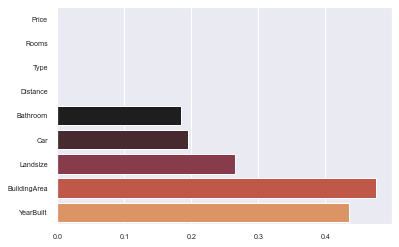

In [24]:
sns.barplot(x=melbourne.isnull().sum()/34857, y=melbourne.columns, palette="icefire")

In [25]:
#Split the data into training and validation data sets
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3)

#Standardize the data before feeding it to PCA algorithm
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

#Use PCA algorithm to reduce the number of features to speed up training 
pca = PCA(.95)
pca.fit(train_X)

train_X = pca.transform(train_X)
val_X = pca.transform(val_X)

In [27]:
# Using Decision Tree Regressor for our data
model = DecisionTreeRegressor(random_state=1, splitter='best')
model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [28]:
#Validate the trained model using validation data-set
crossvalidationtest = cross_val_score(model, X, y)

meanabsoluteerror = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')

print("Model Accuracy:\t",(crossvalidationtest.mean())*100)
print("\nMean Absolute Error:\t",(-1 * meanabsoluteerror.mean()))

Model Accuracy:	 99.79370124612336

Mean Absolute Error:	 604.5075655730116


In [29]:
#Predict Sale Price for houses in cross validation set
prediction_y = model.predict(val_X)

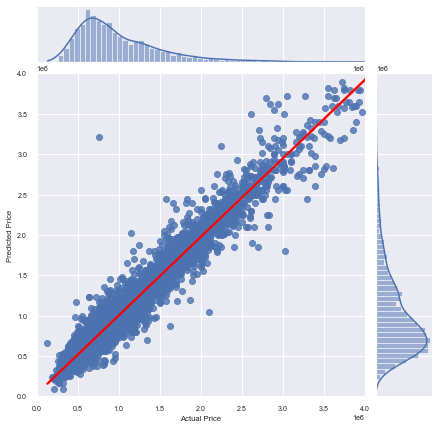

In [30]:
#Plot the actual Price value against predicted Sale Price 
g = sns.jointplot(x= val_y, y= prediction_y, kind='reg', xlim=(0,4000000), ylim=(0,4000000),
                  joint_kws={'line_kws':{'color':'red'}})
g.set_axis_labels(xlabel='Actual Price', ylabel='Predicted Price')

In [31]:
from sklearn import model_selection, preprocessing
for c in melbourne.columns:
    if melbourne[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(melbourne[c].values)) 
        melbourne[c] = lbl.transform(list(melbourne[c].values))

In [32]:
melbourne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         27247 non-null  float64
 1   Rooms         27247 non-null  int64  
 2   Type          27247 non-null  int8   
 3   Distance      27246 non-null  float64
 4   Bathroom      20800 non-null  float64
 5   Car           20423 non-null  float64
 6   Landsize      17982 non-null  float64
 7   BuildingArea  10656 non-null  float64
 8   YearBuilt     12084 non-null  float64
dtypes: float64(7), int64(1), int8(1)
memory usage: 1.9 MB


In [33]:
#Train-Test split
from sklearn.model_selection import train_test_split
label = melbourne.pop('Price')
label=np.log(label)
data_train, data_test, label_train, label_test = train_test_split(melbourne, label, test_size = 0.2, random_state = 500)

In [34]:
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

In [35]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [36]:
dtrain = xgb.DMatrix(data_train, label_train)

In [37]:
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)

[21:23:59] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:23:59] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find a

In [38]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

[21:24:19] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

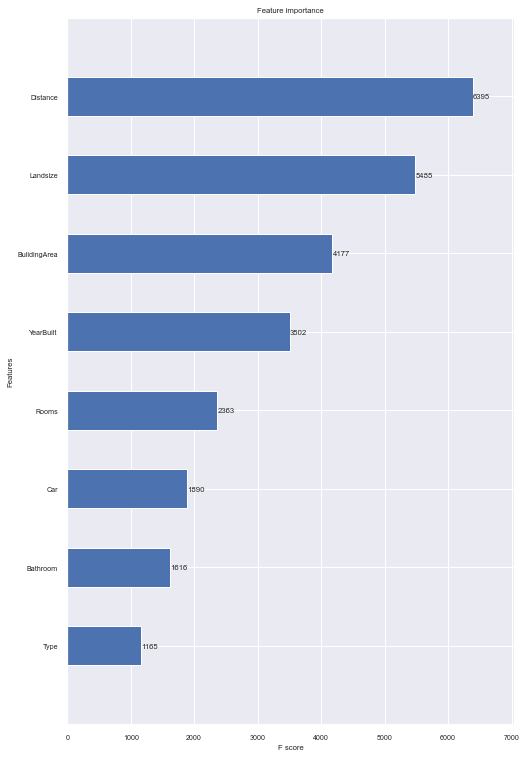

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

In [40]:
dtest=xgb.DMatrix(data_test)

In [41]:
y_predict = np.exp2(model.predict(dtest))

In [42]:
Actual_Price=np.exp2(label_test)

In [43]:
out = pd.DataFrame({'Actual_Price': Actual_Price, 'predict_Price': y_predict,'Diff' :(Actual_Price-y_predict)})

In [44]:
out[['Actual_Price','predict_Price','Diff']].head(10)

,Actual_Price,predict_Price,Diff
23289,9345.279035,8632.276367,713.002668
22598,15883.844263,15838.729492,45.114771
17650,11315.032295,12298.729492,-983.697198
23297,14216.787187,14910.611328,-693.824141
23445,16547.910240,11817.981445,4729.928795
20584,14417.271712,16508.642578,-2091.370866
8562,12254.748420,21341.041016,-9086.292595
4900,10581.257391,15064.420898,-4483.163508
14173,10695.584027,7998.756348,2696.827680
28141,17467.486826,15255.625977,2211.860849


In [45]:
xgbr = xgb.XGBRegressor(verbosity=0) 

In [46]:
xgbr.fit(data_train, label_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [47]:
print("Extreme Gradient Boosting Metrics:")

Extreme Gradient Boosting Metrics:


In [48]:
score = xgbr.score(data_train, label_train)  
print("Training Accuracy Score: ", score*100)

Training Accuracy Score:  82.84371778657902


/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [49]:
score = xgbr.score(data_test, label_test)  
print("Testing Accuracy Score: ", score*100)

Testing Accuracy Score:  76.94780278403836


/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='predict_Price', ylabel='Diff'>

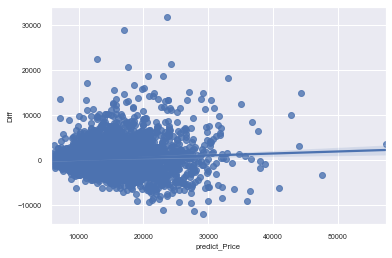

In [50]:
sns.regplot(out['predict_Price'],out['Diff'])